# Newton Examples

The Newton method of solving each block while fixing the others is incredibly fast.
We would like to see what a typical curve looks like for the optimizing function.

In [1]:
library(glstudy)
library(latex2exp)
library(ggplot2)
library(reshape2)
library(gridExtra)

In [2]:
f_ <- function(x, L, v, l1, l2) 
{
    sum(v ** 2 / ((L + l2) * x + l1) ** 2) - 1
}

f <- function(x, L, v, l1, l2) 
{
    sapply(x, function(xi) {f_(xi, L, v, l1, l2)})
}

In [3]:
assess.1 <- function(L, v, l1, l2, tol=1e-8, max.iters=1000, smart_init=TRUE)
{
    out.nsd <- newton_solver_debug(L, v, l1, l2, tol, max.iters, smart_init=smart_init)
    h.min <- out.nsd$h_min
    #h.max <- out.nsd$h_max
    iters <- out.nsd$iters
    smart.iters <- out.nsd$smart_iters
    
    if (sum(out.nsd$beta != 0) == 0) {
        stop("True solution is 0.")
    }
    
    f.min <- f_(h.min, L, v, l1, l2)
    #if (!is.infinite(h.max)) {
    #    f.max <- f_(h.max, L, v, l1, l2)        
    #}
    if (length(iters) > 0) {
        f.iters <- f(iters, L, v, l1, l2)
    }
    hs.max <- ifelse(length(iters) == 0, 1, 2 * max(iters))
    #hs.max <- ifelse(is.infinite(h.max), hs.max, 2 * h.max)
    hs.max <- max(ifelse(length(smart.iters) == 0, 1, 2 * max(smart.iters)), hs.max)
    hs <- seq(0, hs.max, length.out=1000)
    fs <- f(hs, L, v, l1, l2)

    df.f.plot.1 <- data.frame(x=hs, y=fs)
    f.plot.1.title <- TeX(paste(
        "Objective (p=", p, 
        ", $\\lambda_{\\max}$=", round(max(L),2), 
        ", smart_init=", smart_init, 
        ", n_iters=", length(out.nsd$iters), 
        ", smart_iters=", length(out.nsd$smart_iters), 
        ")", 
        sep='')
    )
    f.plot.1 <- ggplot(df.f.plot.1, aes(x=x, y=y)) +
        geom_line() +
        geom_hline(yintercept=0, linetype='dashed', color='red') +
        geom_point(data=data.frame(x=h.min, y=f.min), aes(x=x, y=y), color='red', shape=17) +
        ggtitle(f.plot.1.title) +
        xlab("h") +
        ylab("f")

    #if (!is.infinite(h.max)) {
    #    f.plot.1 <- f.plot.1 + geom_point(data=data.frame(x=h.max, y=f.max), aes(x=x, y=y), color='red', shape=17)
    #}

    if (length(iters) > 0) {
        f.plot.1 <- f.plot.1 + geom_point(data=data.frame(x=iters, y=f.iters), mapping=aes(x=x, y=y), color='blue')
    }
    
    f.smart.iters <- f(smart.iters, L, v, l1, l2)
    if (length(smart.iters) > 0) {
        f.plot.1 <- f.plot.1 + geom_point(data=data.frame(x=smart.iters, y=f.smart.iters), mapping=aes(x=x,y=y), color='cyan')
    }
        
    list(
        plot=f.plot.1,
        out.nsd=out.nsd
    )
}

assess <- function(L, v, l1, l2, tol=1e-8, max.iters=1000) 
{
    out.smart <- assess.1(L, v, l1, l2, tol, max.iters, TRUE)
    out.dumb <- assess.1(L, v, l1, l2, tol, max.iters, FALSE) 
    plt <- arrangeGrob(out.smart$plot, out.dumb$plot, nrow=2)
    plot(plt)
    list(
        smart.nsd=out.smart$out.nsd,
        dumb.nsd=out.dumb$out.nsd
    )
}

In [210]:
p <- 100
eval.max <- 10
seed <- 123
set.seed(seed)
#L <- c(runif(p-5, 0.4, 0.5), runif(5, 0.8*eval.max, eval.max))
#L <- c(0, runif(p-5, 0, 0.1), runif(4, 0.8, eval.max))
#L <- c(rep(0, 10), rep(1e-10, 10), runif(p-30, 0, 0.1), runif(10, 0.8, eval.max))
#L <- c(rep(0, 10), rep(1e-10, 10), runif(p-30, 0, 1e-4), runif(10, 0.8, eval.max))
#d <- as.integer(0.8 * p); L <- c(rep(1e-10, p-d), runif(d, 0.8, eval.max))
L <- rchisq(p, eval.max)
v <- rnorm(p, sd=sqrt(L))
#v <- rnorm(p, sd=1)
alpha <- 1
lmda <- 1e-2
l1 <- alpha * lmda
l2 <- (1-alpha) * lmda

In [211]:
summary(L)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.164   6.945   9.093   9.504  11.091  20.432 

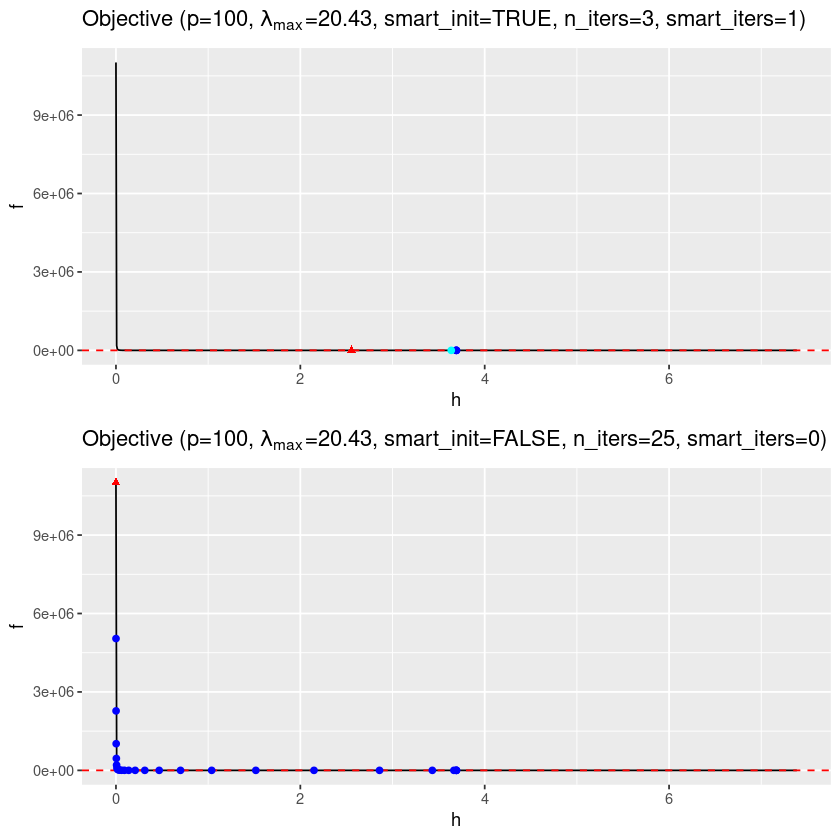

In [212]:
out.1 <- assess(L, v, l1, l2)

In [213]:
out.1

$smart.nsd
$smart.nsd$beta
  [1]  0.231452698 -0.199403274 -0.343328107  0.255535113 -0.057430540
  [6]  0.335911269  0.562444096  0.924903941  0.049918095 -0.120590580
 [11]  0.002147036 -0.810236646 -0.374730248  0.160503656 -0.023473417
 [16]  0.129031443 -0.410024771 -0.265232247 -0.116005362 -0.255894624
 [21]  0.243634320 -0.586772583  0.535952325  0.325266922 -0.451704247
 [26]  0.287842264 -0.655635359  0.175177868 -0.014109967 -0.811324285
 [31] -0.006030642 -0.041476011 -0.559048479  0.295217597 -0.185106768
 [36]  0.483188298 -0.163178419  0.225712429 -0.621565383 -0.672814564
 [41]  0.462066486 -0.176553513  0.429443596 -0.009775010  0.161444215
 [46]  0.637790393 -0.360314690 -0.285419392 -0.073279708 -0.137867913
 [51]  0.097700475  0.556051384 -0.323172222  0.601170021 -0.045990281
 [56]  0.367450268 -0.366961255 -0.200506868  0.228456707 -0.701562662
 [61] -0.019739553 -0.165388122 -0.037526396  0.549036563 -0.295859063
 [66]  0.773443796  0.219121328  0.194951373  0.412803593 -0.207999263
 [71] -0.255731319 -0.201508645  0.249726175 -0.276726547 -0.325851726
 [76]  0.888612278 -0.267749105  0.067897624 -0.040297236 -0.326045784
 [81]  0.155209219  0.250594240 -0.001972794 -0.293177188 -0.139402531
 [86] -0.566544666  0.130302511 -0.178199766  0.096273438 -0.100958273
 [91]  0.324177654  0.049852773  0.880531880  0.112357997 -0.008832295
 [96] -0.274563797  0.064244096 -0.299892377  0.160473218 -0.242608985

$smart.nsd$h_min
[1] 2.554121

$smart.nsd$h_max
[1] 3.694338

$smart.nsd$iters
[1] 3.691704 3.692953 3.692954

$smart.nsd$smart_iters
[1] 3.637327


$dumb.nsd
$dumb.nsd$beta
  [1]  0.231452698 -0.199403274 -0.343328107  0.255535113 -0.057430540
  [6]  0.335911269  0.562444096  0.924903941  0.049918095 -0.120590580
 [11]  0.002147036 -0.810236646 -0.374730248  0.160503656 -0.023473417
 [16]  0.129031443 -0.410024771 -0.265232247 -0.116005362 -0.255894624
 [21]  0.243634320 -0.586772583  0.535952325  0.325266922 -0.451704247
 [26]  0.287842264 -0.655635359  0.175177868 -0.014109967 -0.811324285
 [31] -0.006030642 -0.041476011 -0.559048479  0.295217597 -0.185106768
 [36]  0.483188298 -0.163178419  0.225712429 -0.621565383 -0.672814564
 [41]  0.462066486 -0.176553513  0.429443596 -0.009775010  0.161444215
 [46]  0.637790393 -0.360314690 -0.285419392 -0.073279708 -0.137867913
 [51]  0.097700475  0.556051384 -0.323172222  0.601170021 -0.045990281
 [56]  0.367450268 -0.366961255 -0.200506868  0.228456707 -0.701562662
 [61] -0.019739553 -0.165388122 -0.037526396  0.549036563 -0.295859063
 [66]  0.773443796  0.219121328  0.194951373  0.412803593 -0.207999263
 [71] -0.255731319 -0.201508645  0.249726175 -0.276726547 -0.325851726
 [76]  0.888612278 -0.267749105  0.067897624 -0.040297236 -0.326045784
 [81]  0.155209219  0.250594240 -0.001972794 -0.293177188 -0.139402531
 [86] -0.566544666  0.130302511 -0.178199766  0.096273438 -0.100958273
 [91]  0.324177654  0.049852773  0.880531880  0.112357997 -0.008832295
 [96] -0.274563797  0.064244096 -0.299892377  0.160473218 -0.242608985

$dumb.nsd$h_min
[1] 0

$dumb.nsd$h_max
[1] Inf

$dumb.nsd$iters
 [1] 0.0004736862 0.0012285979 0.0023969831 0.0041804529 0.0068820194
 [6] 0.0109560057 0.0170838861 0.0262882464 0.0401034359 0.0608308680
[11] 0.0919203059 0.1385366046 0.2083925442 0.3129400254 0.4689626887
[16] 0.7003230441 1.0385180134 1.5172709259 2.1482842597 2.8591940232
[21] 3.4319355831 3.6659425876 3.6926584107 3.6929538955 3.6929539309

$dumb.nsd$smart_iters
numeric(0)